In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv("Concrete_Data.csv")
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [32]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
target_var = df.columns[-1]
input_var = df.columns[0]
print(target_var, input_var)

Concrete_compressive_strength  Cement 


In [33]:
print(type(target_var))

<class 'str'>


In [11]:
data = df.drop(target_var, axis=1)
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [34]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [12]:
target_values = df[target_var]
target_values

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete_compressive_strength , Length: 1030, dtype: float64

In [35]:
print(type(target_values))

<class 'pandas.core.series.Series'>


In [13]:
input_variables = df[input_var]
input_variables

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: Cement , Length: 1030, dtype: float64

In [15]:
input_variables.fillna(input_variables.median(), inplace=True)

In [16]:
target_values.fillna(input_variables.median(), inplace=True)

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(input_variables, target_values, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [36]:
print(type(X_train))

<class 'numpy.ndarray'>


In [19]:
X_train.head()

140    313.3
173    318.8
6      380.0
764    385.0
519    284.0
Name: Cement , dtype: float64

In [20]:
print(X_train)

140    313.3
173    318.8
6      380.0
764    385.0
519    284.0
       ...  
87     286.3
330    246.8
466    190.3
121    475.0
860    314.0
Name: Cement , Length: 618, dtype: float64


In [21]:
X_train.dtype

dtype('float64')

In [31]:
print(type(X_train))

<class 'numpy.ndarray'>


In [39]:
print(type(X_test))

<class 'pandas.core.series.Series'>


In [40]:
print(type(X_valid))

<class 'pandas.core.series.Series'>


In [43]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_valid = X_valid.reshape(-1, 1)
# print(X_train)

In [27]:
X_train.dtype

dtype('float64')

In [44]:
print(type(X_train))

<class 'numpy.ndarray'>


In [45]:
# Simple Linear Regression

In [46]:
regressor = LinearRegression()

In [47]:
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
# y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
y_pred_valid = regressor.predict(X_valid)
y_pred_test = regressor.predict(X_test)

In [120]:
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid))

In [121]:
# print("RMSE of training data = ", rmse_train:.4f)
print(f"RMSE of training data = {rmse_train:.4f}")
print(f"RMSE of validation data = {rmse_valid:.4f}")
print(f"RMSE of testing data = {rmse_test:.4f}")

RMSE of training data = 14.7582
RMSE of validation data = 14.3304
RMSE of testing data = 14.6420


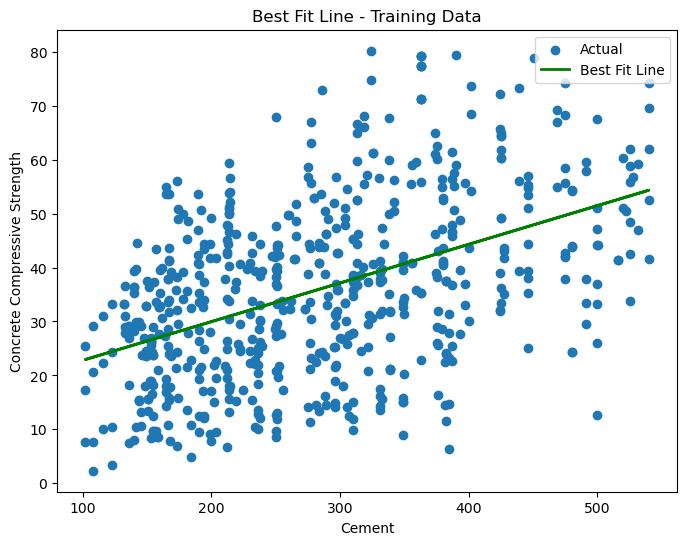

In [62]:
# Plot best fit line on training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Actual")
plt.plot(X_train, y_pred_train, color='green', linewidth=2, label="Best Fit Line")
plt.xlabel('Cement')
plt.ylabel('Concrete Compressive Strength')
plt.title('Best Fit Line - Training Data')
plt.legend()
plt.show()

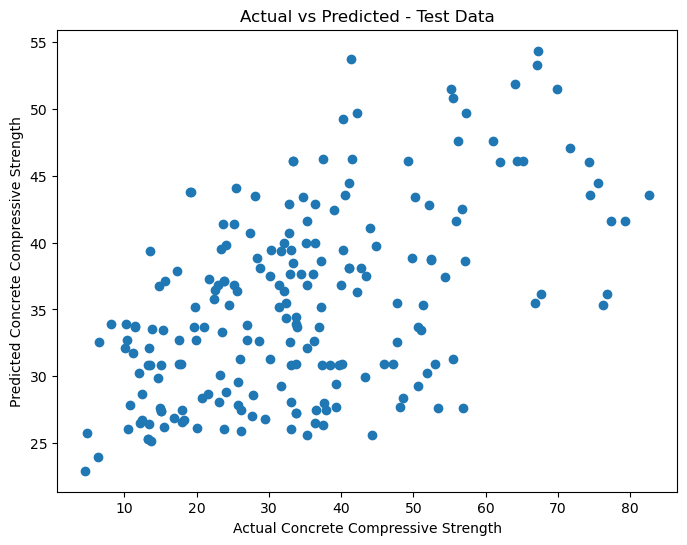

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Concrete Compressive Strength')
plt.ylabel('Predicted Concrete Compressive Strength')
plt.title('Actual vs Predicted - Test Data')
plt.show()

In [64]:
# Polynomial curve fitting
# We shall have two approaches towards this - one, write for a particular value of "p" as a variable, other is to embed in a for loop and judge the best degree, depending of the minium RMSE

In [68]:
from sklearn.preprocessing import PolynomialFeatures
p = 2
poly_features = PolynomialFeatures(degree=p)

In [72]:
x_poly_test = poly_features.fit_transform(X_test)

In [70]:
regressor = LinearRegression()

In [73]:
regressor.fit(x_poly_test, y_test)

LinearRegression()

In [108]:
x_poly_train = poly_features.fit_transform(X_train)
x_poly_test = poly_features.fit_transform(X_test)
x_poly_valid = poly_features.fit_transform(X_valid)

In [77]:
y_pred_poly_test = regressor.predict(x_poly_test)
y_pred_poly_train = regressor.predict(x_poly_train)
y_pred_poly_valid = regressor.predict(x_poly_valid)

In [122]:
rmse_poly_test = sqrt(mean_squared_error(y_pred_poly_test, y_test))
rmse_poly_train = sqrt(mean_squared_error(y_pred_poly_train, y_train))
rmse_poly_valid = sqrt(mean_squared_error(y_pred_poly_valid, y_valid))

In [123]:
print(f"RMSE of polynomial d={2} for training data={rmse_poly_train:.4f}")
print(f"RMSE of polynomial d={2} for testing data={rmse_poly_test:.4f}")
print(f"RMSE of polynomial d={2} for validation data={rmse_poly_valid:.4f}")

RMSE of polynomial d=2 for training data=14.7582
RMSE of polynomial d=2 for testing data=14.6420
RMSE of polynomial d=2 for validation data=14.3304


In [93]:
print(X_train.shape)

(618, 1)


In [94]:
print(y_pred_poly_train.shape)

(618,)


In [98]:
X_train_temp = X_train[:, 0]
print(X_train_temp.shape)

(618,)


In [103]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [104]:
y_train_temp = y_train.to_numpy()

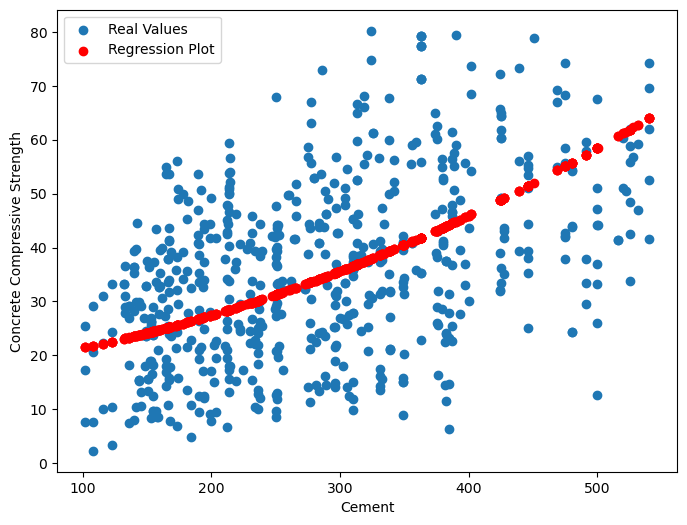

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_temp, y_train_temp, label="Real Values")
# plt.plot(X_train_temp, y_pred_poly_train, color="Red", label="Regression Plot", linestyle="-")
plt.scatter(X_train_temp, y_pred_poly_train, color="Red", label="Regression Plot", linestyle="-")
plt.xlabel("Cement")
plt.ylabel("Concrete Compressive Strength")
plt.legend()
plt.show()